# Final CNN Model for Classification

In [1]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import cv2
import os
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
tf.compat.v1.set_random_seed(2019)
import seaborn as sns
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
import splitfolders
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [2]:
# Defining model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = "relu" , input_shape = (180,180,3)) ,
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu") ,  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation = "relu"),  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(550,activation="relu"),      #Adding the Hidden layer
    tf.keras.layers.Dropout(0.1,seed = 2019),
    tf.keras.layers.Dense(400,activation ="relu"),
    tf.keras.layers.Dropout(0.3,seed = 2019),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dropout(0.4,seed = 2019),
    tf.keras.layers.Dense(200,activation ="relu"),
    tf.keras.layers.Dropout(0.2,seed = 2019),
    tf.keras.layers.Dense(5,activation = "softmax")   #Adding the Output Layer
])

In [3]:
# To get the overview of the Model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 64)       0

In [4]:
adam=Adam(lr=0.001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['acc'])

C:\Users\ebicshr\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [5]:
# !pip install split_folders

In [31]:
# I have already separated Test Samples of 100 for each class. Below is the split for Train and Validation set.
input_folder = "C:/Users/Downloads/Object Detection" #Enter Input Folder   
output = "C:/Users/Downloads/Train_Test_Data" #Enter Output Folder

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(0.8,0.2))

In [5]:
bs=30         #Setting batch size
train_dir = "C:/Users/Downloads/Train_Test_Data/train/"   #Setting training directory
validation_dir = "C:/Users/Downloads/Train_Test_Data/val/"   #Setting Validation directory
test_dir = "C:/Users/Downloads/Train_Test_Data/test/"   #Setting Testing directory

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
val_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )
tf.random.set_seed(1)
# Flow training images in batches of 20 using train_datagen generator
#Flow_from_directory function lets the classifier directly identify the labels from the name of the directories the image lies in
train_generator=train_datagen.flow_from_directory(train_dir,batch_size=bs,class_mode='categorical',target_size=(180,180))
# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  val_datagen.flow_from_directory(validation_dir,
                                                         batch_size=bs,
                                                         class_mode  = 'categorical',
                                                         target_size=(180,180))
# Flow Testing images in batches of 20 using test_datagen generator
test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=bs,
                                                         class_mode  = 'categorical',
                                                         target_size=(180,180))

Found 12000 images belonging to 5 classes.
Found 2400 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [6]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=150 // bs,
                    epochs=30,
                    validation_steps=50 // bs,
                    verbose=2)

Epoch 1/30
5/5 - 16s - loss: 1.6361 - acc: 0.2067 - val_loss: 1.6150 - val_acc: 0.1667 - 16s/epoch - 3s/step
Epoch 2/30
5/5 - 14s - loss: 1.6177 - acc: 0.1933 - val_loss: 1.6071 - val_acc: 0.0667 - 14s/epoch - 3s/step
Epoch 3/30
5/5 - 13s - loss: 1.6030 - acc: 0.2267 - val_loss: 1.5770 - val_acc: 0.2333 - 13s/epoch - 3s/step
Epoch 4/30
5/5 - 13s - loss: 1.5675 - acc: 0.2267 - val_loss: 1.6274 - val_acc: 0.0667 - 13s/epoch - 3s/step
Epoch 5/30
5/5 - 12s - loss: 1.5421 - acc: 0.2467 - val_loss: 1.5488 - val_acc: 0.3333 - 12s/epoch - 2s/step
Epoch 6/30
5/5 - 13s - loss: 1.4974 - acc: 0.2933 - val_loss: 1.2479 - val_acc: 0.5333 - 13s/epoch - 3s/step
Epoch 7/30
5/5 - 14s - loss: 1.3594 - acc: 0.3933 - val_loss: 1.3264 - val_acc: 0.2333 - 14s/epoch - 3s/step
Epoch 8/30
5/5 - 12s - loss: 1.4215 - acc: 0.3600 - val_loss: 1.4040 - val_acc: 0.3333 - 12s/epoch - 2s/step
Epoch 9/30
5/5 - 13s - loss: 1.2887 - acc: 0.4133 - val_loss: 1.2973 - val_acc: 0.4667 - 13s/epoch - 3s/step
Epoch 10/30
5/5 - 1

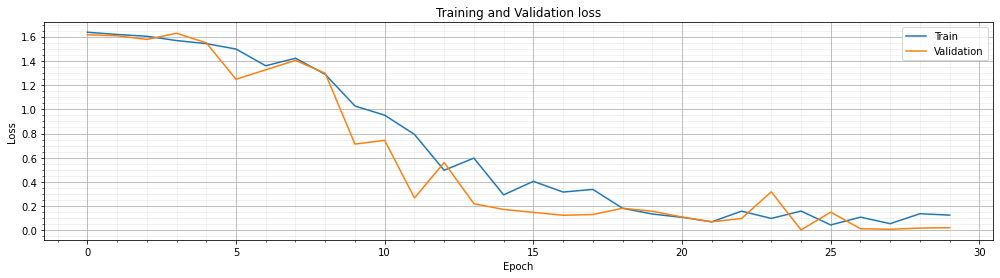

In [7]:
# Training and Validation Loss
plt.figure(figsize=(17,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(b=True, which='major')
plt.minorticks_on()
plt.grid(b=True, which='minor', alpha=0.2)
plt.legend(['Train', 'Validation'])
plt.show()

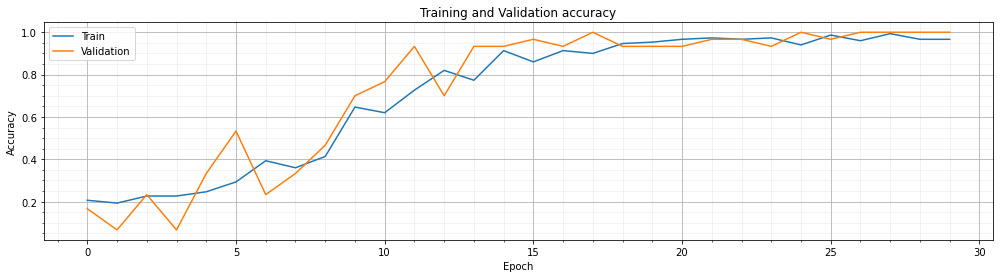

In [8]:
# Training and Validation Accuracy
plt.figure(figsize=(17,4))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training','validation'])
plt.title('Training and Validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid(b=True, which='major')
plt.minorticks_on()
plt.grid(b=True, which='minor', alpha=0.2)
plt.legend(['Train', 'Validation'])
plt.show()

In [10]:
# Model Evaluation on Validation Set
val_loss, val_accu = model.evaluate(validation_generator)
print(f'Validation accuracy: {val_accu}, Validation loss is {val_loss}')

80/80 [==============================] - 109s 1s/step - loss: 0.1105 - acc: 0.9688
Validation accuracy: 0.96875, Validation loss is 0.1104796975851059


## Predictions on Test Data

In [11]:
# Model Evaluation on Test Set
test_loss, test_accu = model.evaluate(test_generator)
print(f'Test accuracy: {test_accu}, Test loss is {test_loss}')

17/17 [==============================] - 23s 1s/step - loss: 0.0060 - acc: 1.0000
Test accuracy: 1.0, Test loss is 0.00595909683033824


In [16]:
# Input Dataframe
listing = os.listdir("C:/Users/Downloads/Train_Test_Data/test/")
columns=['Image_Name','Actual_Values']
input_df = pd.DataFrame(columns=columns)
Image_Name=[]
Actual_Values=[]
for lis in listing:
    Class_folder = os.listdir("C:/Users/Downloads/Train_Test_Data/test/"+lis)
    input_df = pd.DataFrame(columns=columns)
    for i in Class_folder:
        Image_Name.append(i)
        Actual_Values.append(lis)
    input_df['Image_Name']=Image_Name
    input_df['Actual_Values']=Actual_Values
len(input_df)   

500

In [17]:
# Predicted Dataframe
class_names=['Jumping','Lay_Down','Partial_Lay_Down','Sitting','Standing']
columns=['Predicted_Values','Confidence']
pred=pd.DataFrame(columns=columns)
Predicted_Values=[]
Confidence=[]
predictions = model.predict(test_generator)
for i in range(len(predictions)):
    score = tf.nn.softmax(predictions[i])
    Predicted_Values.append(class_names[np.argmax(score)])
    Confidence.append(100 * np.max(score))
pred['Predicted_Values']=Predicted_Values
pred['Confidence']=Confidence

In [45]:
df_final=pd.concat([input_df,pred],axis=1)
# df_final.head()
# df_final.to_csv("df_final.csv")

## Model Evaluation

In [52]:
df_output=pd.read_csv(r"C:\Users\Downloads\df_final.csv")
df_output.head()

,Image_Name,Actual_Values,Predicted_Values,Confidence
0,Jumping3127.jpg,Jumping,Jumping,40.460959
1,Jumping3131.jpg,Jumping,Jumping,40.460962
2,Jumping3132.jpg,Jumping,Jumping,40.460956
3,Jumping3155.jpg,Jumping,Jumping,40.460950
4,Jumping3163.jpg,Jumping,Jumping,40.460971


In [53]:
# Classification Report for Test Data
y_true=df_output['Actual_Values'].to_list()
y_pred=df_output['Predicted_Values'].to_list()
print(classification_report(y_true, y_pred, target_names=class_names))

                  precision    recall  f1-score   support

        Standing       0.93      0.97      0.95       100
         Sitting       0.98      0.98      0.98       100
        Lay_Down       0.99      0.98      0.98       100
Partial_Lay_Down       0.99      0.98      0.98       100
         Jumping       0.98      0.96      0.97       100

        accuracy                           0.97       500
       macro avg       0.97      0.97      0.97       500
    weighted avg       0.97      0.97      0.97       500



In [54]:
# Confusion Matrix
confusion_matrix = pd.crosstab(df_output['Actual_Values'], df_output['Predicted_Values'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted         Jumping  Lay_Down  Partial_Lay_Down  Sitting  Standing
Actual                                                                  
Jumping                97         1                 1        0         1
Lay_Down                1        98                 0        1         0
Partial_Lay_Down        1         1                98        0         0
Sitting                 1         0                 0       98         1
Standing                4         0                 0        0        96


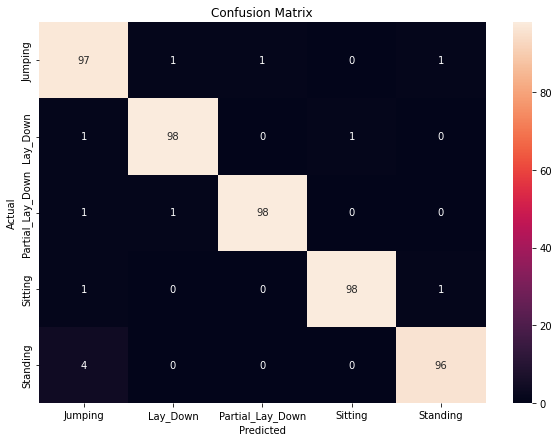

In [55]:
#Heatmap for Actual and Predicted Values
plt.figure(figsize=(10,7))
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix, annot=True)
plt.show()

# CONCLUSION

Model is working good as per the results reflecting in evaluation metrics. As seen clearly, although accuracy score is almost 1 (100%) but here in Classification report we see a variation in the numbers of respective classes. We are getting good and satisfactory results for almost all classes. There is an anomaly for class ‘Standing’ where Precision score is 0.93 (93%) but the recall and F1-score is acceptable. Similarly, all other classes have good recall, precision, and F1-score. Recall for ‘Jumping’ has dropped a bit to 0.96 (96%) but recall and F1-score gives a promising result.